#### Challenge ####
Do a little scraping or API-calling of your own. Pick a new website and see what you can get out of it. Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)</br>
2) Iterate over multiple pages/queries</br>
3) Save the data to your computer</br>

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest. Write up a report from scraping code to summary and share it with your mentor.

In [1]:
import pandas as pd
import numpy as np
import arxiv
import matplotlib.pyplot as plt

In [2]:
result = arxiv.query("all",max_results=1000)

df = pd.DataFrame(result)

In [3]:
df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,None,"{'term': 'math.CO', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1907.06744v1,Matthew Kwan,{'name': 'Matthew Kwan'},"[Asaf Ferber, Matthew Kwan]",None,True,http://arxiv.org/abs/1907.06744v1,...,http://arxiv.org/pdf/1907.06744v1,2019-07-15T20:43:42Z,"(2019, 7, 15, 20, 43, 42, 0, 196, 0)","We show that for any n divisible by 3, almost ...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.CO', 'scheme': 'http://arxiv.o...",Almost all Steiner triple systems are almost r...,"{'type': 'text/plain', 'language': None, 'base...",2019-07-15T20:43:42Z,"(2019, 7, 15, 20, 43, 42, 0, 196, 0)"
1,None,None,"{'term': 'math.NA', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1210.7708v1,Alexei Shadrin,{'name': 'Alexei Shadrin'},[Alexei Shadrin],None,True,http://arxiv.org/abs/1210.7708v1,...,http://arxiv.org/pdf/1210.7708v1,2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)",The Landau-Kolmogorov problem consists of find...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.NA', 'scheme': 'http://arxiv.o...",Landau--Kolmogorov inequality revisited,"{'type': 'text/plain', 'language': None, 'base...",2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)"
2,None,"23 pages, 7 figures","{'term': 'cond-mat.mtrl-sci', 'scheme': 'http:...",http://arxiv.org/abs/1602.00450v1,M. Kawasaki,{'name': 'M. Kawasaki'},"[T. C. Fujita, M. Uchida, Y. Kozuka, W. Sano, ...",10.1103/PhysRevB.93.064419,True,http://arxiv.org/abs/1602.00450v1,...,http://arxiv.org/pdf/1602.00450v1,2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)","Pyrochlore oxides possessing ""all-in-all-out"" ...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http...",All-in-all-out magnetic domain wall conduction...,"{'type': 'text/plain', 'language': None, 'base...",2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)"
3,None,None,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1612.01842v2,Zaid Hussain,{'name': 'Zaid Hussain'},[Zaid Hussain],None,True,http://arxiv.org/abs/1612.01842v2,...,http://arxiv.org/pdf/1612.01842v2,2016-12-06T15:01:47Z,"(2016, 12, 6, 15, 1, 47, 1, 341, 0)","Recently, a higher dimensional Eisenstein-Jaco...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.DC', 'scheme': 'http://arxiv.org...",An Improved One-to-All Broadcasting in Higher ...,"{'type': 'text/plain', 'language': None, 'base...",2016-12-07T06:10:53Z,"(2016, 12, 7, 6, 10, 53, 2, 342, 0)"
4,None,"33 pages, 18 figures","{'term': 'math.CO', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/0705.3599v1,Chris Smyth,{'name': 'Chris Smyth'},"[James McKee, Chris Smyth]",None,True,http://arxiv.org/abs/0705.3599v1,...,http://arxiv.org/pdf/0705.3599v1,2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)",We completely describe all integer symmetric m...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.CO', 'scheme': 'http://arxiv.o...",Integer symmetric matrices having all their ei...,"{'type': 'text/plain', 'language': None, 'base...",2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)"


In [4]:
df['arxiv_primary_category'] = df['arxiv_primary_category'].astype(str).str.replace('{\'term\': \'','').str.replace(r'\.(.*)','').str.replace(r'\',(.*)','')

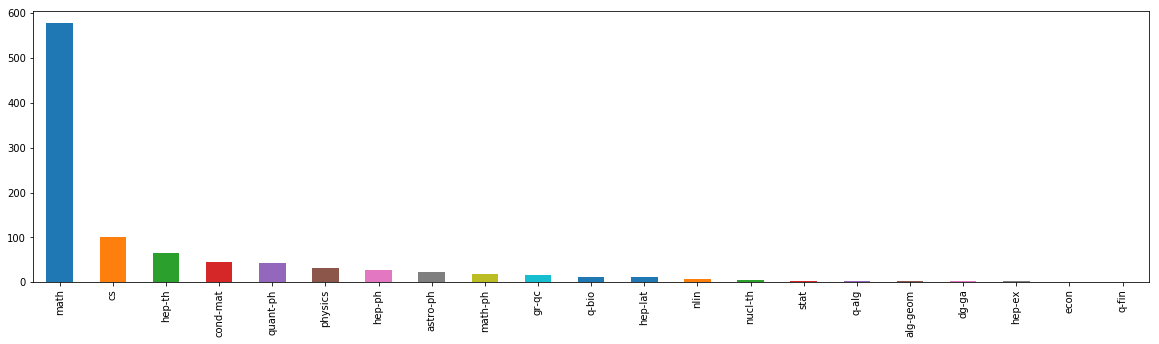

In [5]:
plt.figure(figsize=(20,5))
ax = df['arxiv_primary_category'].value_counts().plot(kind='bar',rot=90)